# Get non bonded potential energy

In [1]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

In [2]:
molecular_system = msm.convert(msm.systems['Barnase-Barstar']['barnase_barstar.h5msm'])

In [3]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,BARNASE,protein,1727,110,1,0,0,BARNASE
1,BARSTAR,protein,1432,89,1,0,1,BARSTAR


In [4]:
U1nb2 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_name=="BARNASE"',
                                                              selection_2='molecule_name=="BARSTAR"')

In [5]:
U1nb2

-761.0340701918301 <Unit('kilocalorie / mole')>

In [6]:
U12 = msm.molecular_mechanics.get_potential_energy(molecular_system)
U1 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="BARNASE"')
U2 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="BARSTAR"')

In [7]:
U12-U1-U2

-761.0342343040447 <Unit('kilocalorie / mole')>

In [8]:
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_name=="BARNASE"',
                                                              selection_2='all in groups of molecule_name=="BARSTAR"')

In [9]:
U12_groups

Magnitude,[[21.872896081402924 8.17112439449157 0.024471752502266353 ... -0.09061683888189195 0.01890663890948031 -7.015748871899927] [-0.9164427252162255 -0.2746363214963253 0.0007804447560647705 ... 0.004529497135665631 0.00045222032594407265 0.1943052156933407] [0.34020051901472687 0.10307637500945285 0.0006588991467856996 ... -0.0025702651098626975 0.0008331259167673027 -0.0851483691490859] ... [17.8323662759697 7.60210905202716 0.05976431228462642 ... -0.10938019301193849 0.0897527709745768 -7.684498854394624] [0.27357551837286576 0.09709699204045545 0.0006431717261757495 ... -0.0026560108930613296 0.0014619378241252717 -0.09023356847963643] [-0.17038358101197454 -0.26837538350836493 0.001326958376408535 ... 0.008439903377232999 -0.016859381764158462 0.49594734184600653]]
Units,kilocalorie/mole


/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook.py:733: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


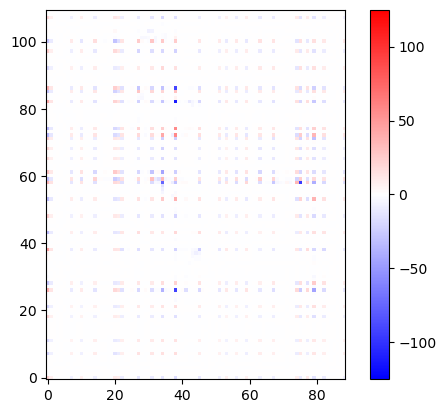

In [10]:
import matplotlib.pyplot as plt

plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-125, vmax=125)
plt.colorbar()
plt.show()

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


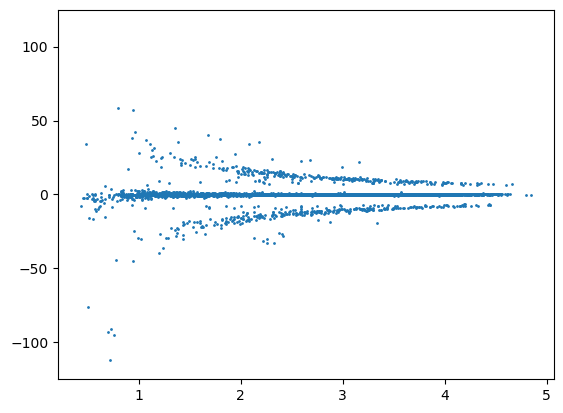

In [11]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_name=="BARNASE"',
                 selection_2='all in groups of molecule_name=="BARSTAR"')

plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-125.0, 125.0])
plt.show()

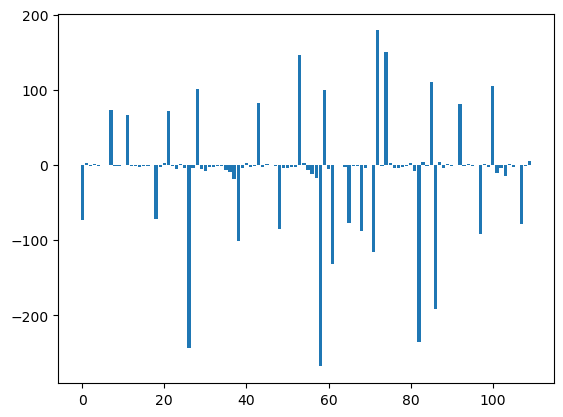

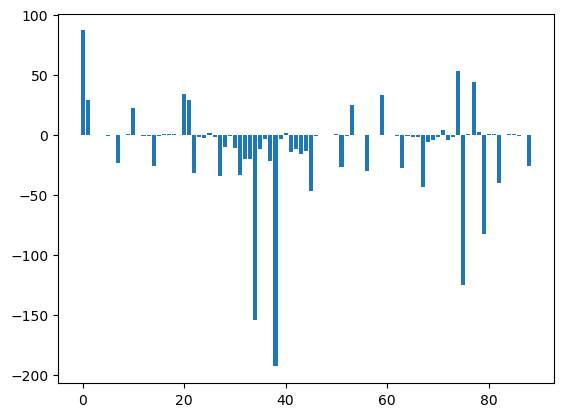

In [12]:
import numpy as np

U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [13]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all')
msm.thirds.nglview.color_by_value(view, aux, min_value= -max_abs_val, max_value= max_abs_val, cmap='bwr')
view

NGLWidget()